<a href="https://colab.research.google.com/github/edermartelinho/Aprendizado_Nao_Supervisionado/blob/main/Aprendizado_N%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### * Importando as Bibliotecas para as Análises

In [ ]:
!pip install pandas-flavor==0.1.1
!pip install -U pingouin
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.5 MB/s eta 0:00:00


## * Importar Bibliotecas Para Utilizar no Aprendizado de Máquina

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # KFold Class.

# Métodos Não Supervisionado

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.preprocessing import StandardScaler

from itertools import cycle


# * Importando o Banco Pelo Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasetDiabets=pd.read_csv('/content/drive/MyDrive/Curso_Ciencias_de_Dados/Diabetes.csv')
#datasetDiabets

In [ ]:
datasetDiabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               768 non-null    int64  
 1   Id Pacientes                             768 non-null    int64  
 2   N_gravidez                               768 non-null    int64  
 3   concentracao de glicose após duas horas  768 non-null    int64  
 4   Pressao Diaastolica                      768 non-null    int64  
 5   Espessura da dobra cutânea (mm)          768 non-null    int64  
 6   Insulina 2 hrs ((mm U/ml)                768 non-null    int64  
 7   IMC                                      768 non-null    float64
 8   DiabetesPedigreeFunction                 768 non-null    float64
 9   Age                                      768 non-null    int64  
 10  Saudavel                                 768 non-n

## Verificando a correlação entre as variáveis

In [ ]:
corr=datasetDiabets.iloc[:,2:10].corr()
corr

,N_gravidez,concentracao de glicose após duas horas,Pressao Diaastolica,Espessura da dobra cutânea (mm),Insulina 2 hrs ((mm U/ml),IMC,DiabetesPedigreeFunction,Age
N_gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.026205,0.544341
concentracao de glicose após duas horas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.133163,0.263514
Pressao Diaastolica,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.051436,0.239528
Espessura da dobra cutânea (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.154274,-0.113970
Insulina 2 hrs ((mm U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185207,-0.042163
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.103575,0.036242
DiabetesPedigreeFunction,-0.026205,0.133163,0.051436,0.154274,0.185207,0.103575,1.000000,0.017970
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.017970,1.000000


<Axes: >

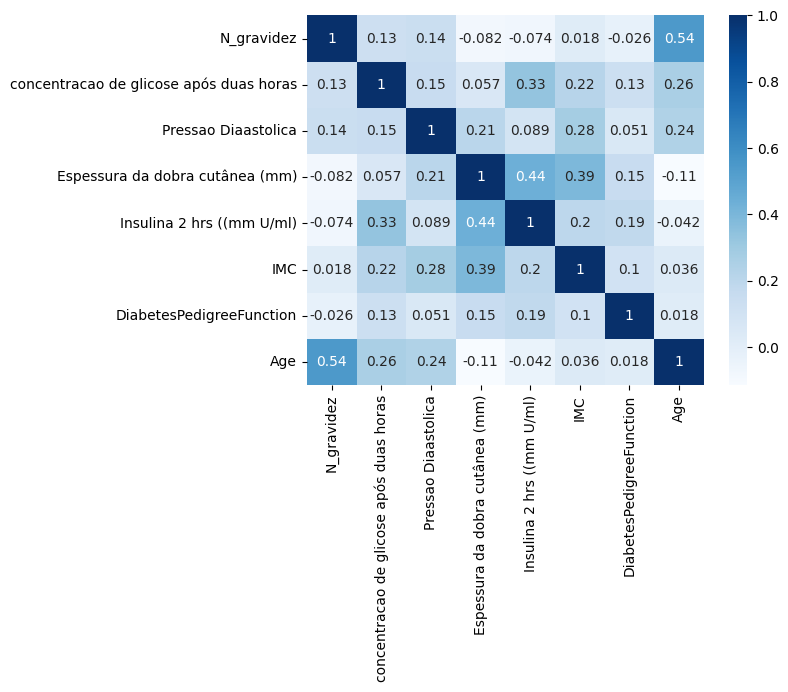

In [ ]:
sns.heatmap(corr,annot=True,cmap='Blues')

# * ***Separando o Grupo Para Identificar o Padrão***

### *Tem que usar o banco Diabetes inicial, pois no banco para o aprendizado só pode ter as variáveis que levam a diabetes (variáveis independentes), não pode ter várias variáveis categóricas como o diabetesCat (só pode ter uma variável dependente).

### *Vou adicionar ao modelo somente as variáveis que obteram a correlação > 0.3.

In [ ]:
X = datasetDiabets.drop(columns=['Unnamed: 0','Id Pacientes', 'Saudavel','DiabetesPedigreeFunction', 'Pressao Diaastolica']) #identificando as colunas das variáveis independentes
X=X.reindex(['Age',  'N_gravidez', 'Insulina 2 hrs ((mm U/ml)', 'Espessura da dobra cutânea (mm)', 'IMC', 'concentracao de glicose após duas horas'], axis=1)

In [ ]:
X

,Age,N_gravidez,Insulina 2 hrs ((mm U/ml),Espessura da dobra cutânea (mm),IMC,concentracao de glicose após duas horas
0,31,1,0,29,26.6,85
1,21,1,94,23,28.1,89
2,30,5,0,0,25.6,116
3,29,10,0,0,35.3,115
4,30,4,0,0,37.6,110
...,...,...,...,...,...,...
763,37,1,110,39,36.5,128
764,52,0,0,0,36.3,123
765,66,6,0,0,35.5,190
766,43,9,0,31,44.0,170


In [ ]:
#array = datasetDiabets.values
X_scale = StandardScaler().fit_transform(X) # normaliza os dados, transformando em uma normal com média 0 e var 1
Y = datasetDiabets['Saudavel'] # identificando a coluna da variável dependente

## * Escolhendo o Melhor Modelo PCA para os Dados

## * componente é uma variável independente

A variação do modelo quando utiliza 1 componente é explicada em 30.628333088346622
O maior silhouette do grupo é 0.5591672073724071 com 3 grupos


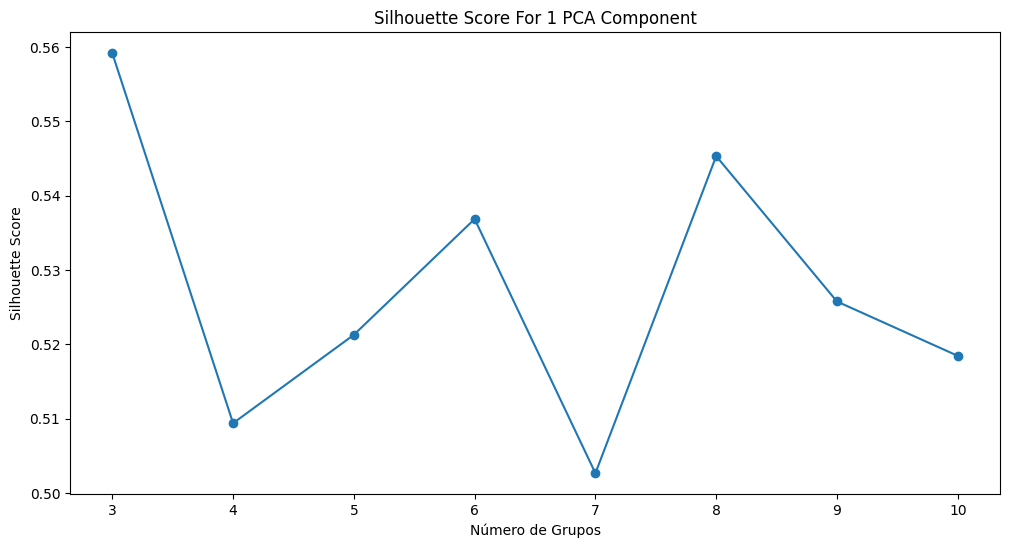

A variação do modelo quando utiliza 2 componente é explicada em 58.65070053187089
O maior silhouette do grupo é 0.40226929934147665 com 3 grupos


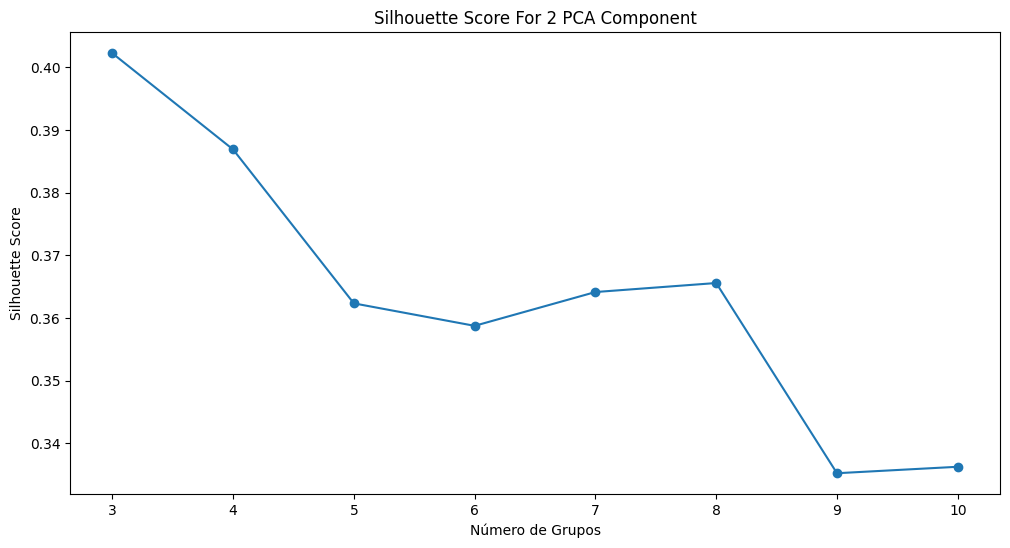

A variação do modelo quando utiliza 3 componente é explicada em 73.58104151407315
O maior silhouette do grupo é 0.3165046843633971 com 3 grupos


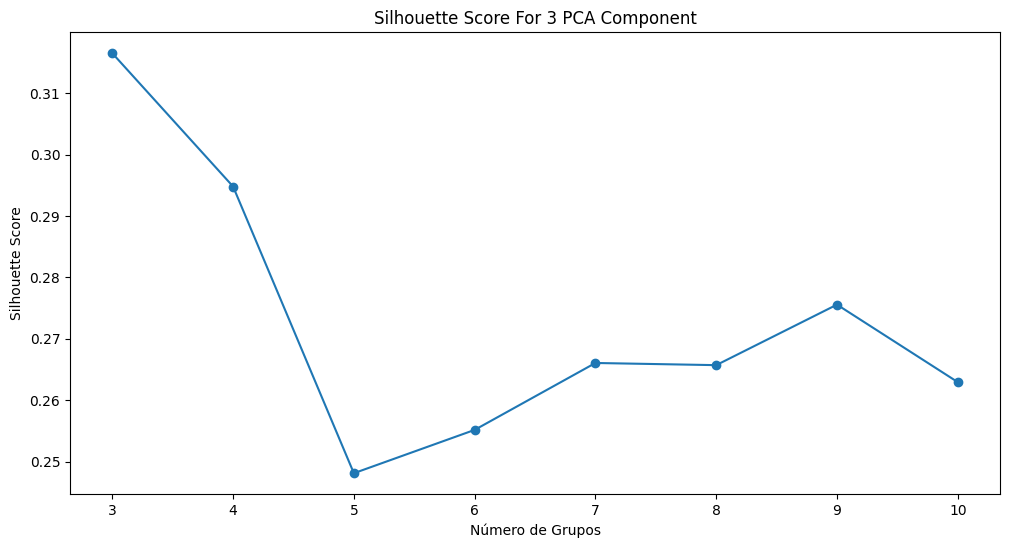

A variação do modelo quando utiliza 4 componente é explicada em 85.97002878234159
O maior silhouette do grupo é 0.2649988881504047 com 3 grupos


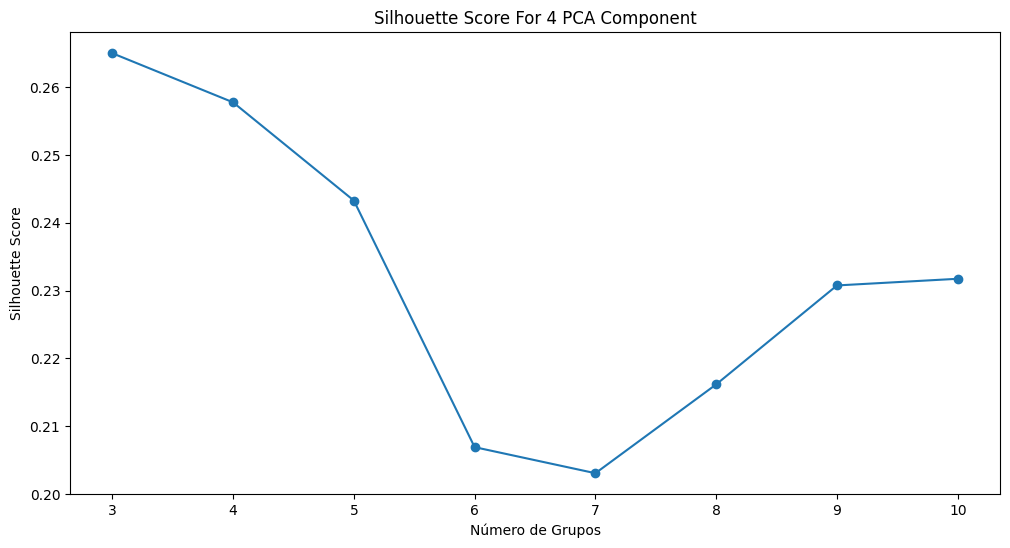

A variação do modelo quando utiliza 5 componente é explicada em 93.25827563212616
O maior silhouette do grupo é 0.24414678254199887 com 3 grupos


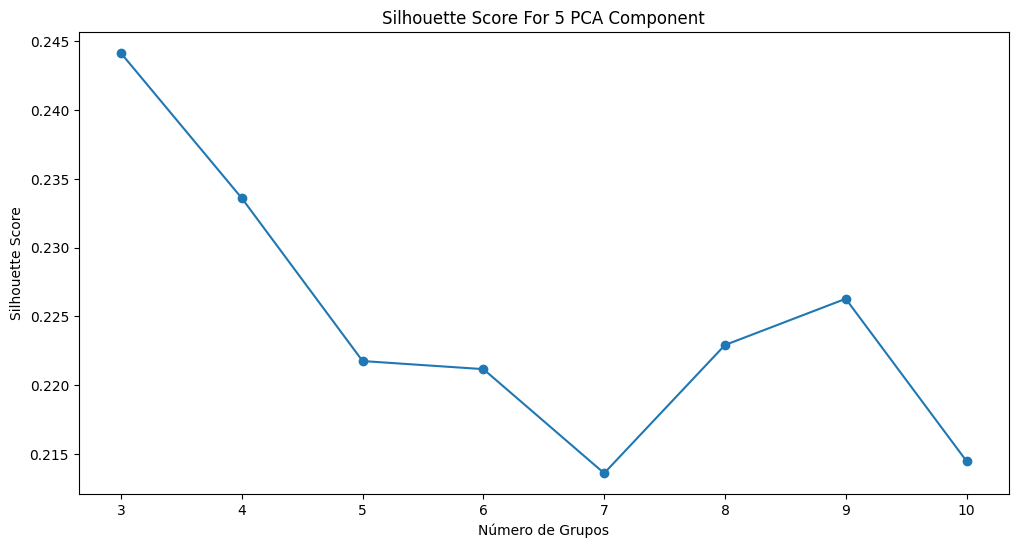

A variação do modelo quando utiliza 6 componente é explicada em 99.99999999999997
O maior silhouette do grupo é 0.2255020629582727 com 3 grupos


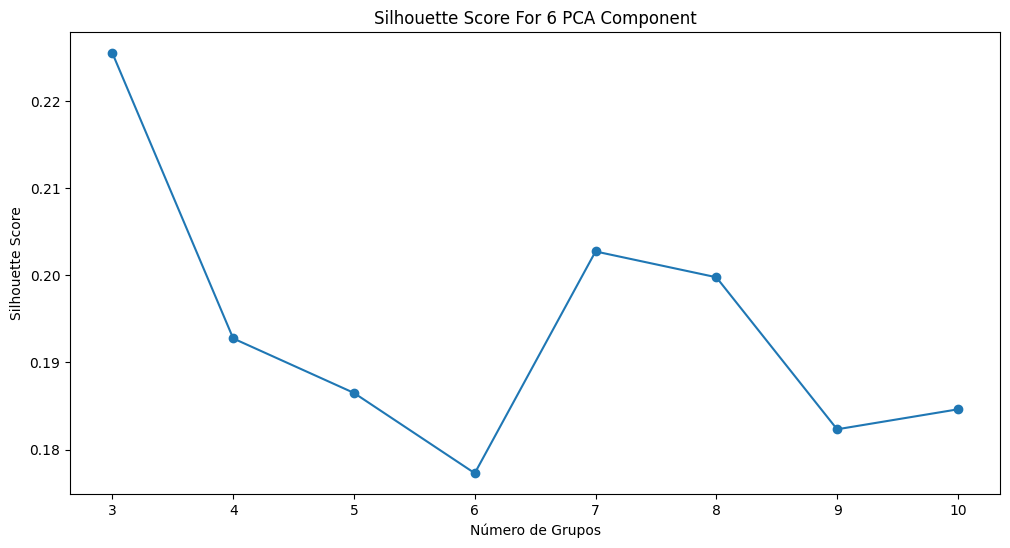

0.2


In [ ]:
n=1
resSilhouette=[]
maxGrupo=[]
components = X_scale.shape[1]
while(n <= components):
    modelPca = PCA(n_components = n, random_state=43)
    modelPca.fit(X_scale)
    reduct_Diabets = modelPca.transform(X_scale)
    print('A variação do modelo quando utiliza {} componente é explicada em {}'.format(n,modelPca.explained_variance_ratio_.sum() * 100))

    clusters = [3,4,5,6,7,8,9,10] # number of clusters
    scoresSilhouette = [] # silhouette scores
    grupo=[]
    maxsilhouete=0.20
    maxcluster=0
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=30).fit(reduct_Diabets)
        silhouette = silhouette_score(reduct_Diabets, kmeans.labels_)
        scoresSilhouette.append(silhouette)
        grupo.append(k)
        if ((silhouette > maxsilhouete) and ((modelPca.explained_variance_ratio_.sum() * 100) > 80)):
            maxsilhouete=silhouette
            maxcluster=k
    resSilhouette.append(maxsilhouete)
    #print(grupo[scoresSilhouette.index(max(scoresSilhouette))])
    print('O maior silhouette do grupo é {} com {} grupos'.format(max(scoresSilhouette), grupo[scoresSilhouette.index(max(scoresSilhouette))]))
       #[maxsilhouete,maxcluster])

    plt.figure(figsize=(12,6))
    plt.plot(clusters,scoresSilhouette, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Número de Grupos')
    plt.ylabel('Silhouette Score')
    plt.show()
    scoresSilhouette = []
    maxsilhouete=0.20
    maxcluster=0
    n=n+1
print(min(resSilhouette))

In [ ]:
modelPca = PCA(n_components = 9, random_state=43)

# * Interpretação: Nos modelos de PCA, os componentes são um conjunto de variáveis que explicam a variabilidade do modelo ou as variáveis que descrevem melhor a variável dependente. No nosso exemplo temos que a variável dependente é a variável saudável, que representa se a mulher é diabética ou não, e as demais são os componentes. Acima contruímos modelos aumentando o número de variáveis ou componentes. Foi observado que com 3 ou 4 componentes a variação do modelo é explicada em 73,6% e 86%, com uma criação de 3 grupos para cada modelo. Já quando avaliamos os grupos criados pelos modelos o primeiro apresentou um silhouette de 0.32 e o segundo 0.26. A partir de 5 componentes a variabilidade é melhor explicada, porém o silhouette cai a cada novo componente adicionado ao modelo. Devido a esses fatos o modelo com 3 componentes e 3 grupos foi o modelo escolhido, pois possui um equilíbrio entre a variabilidade e a avalação dos grupos criados.

## * Método de Mean Shift

In [ ]:
bandwidth = estimate_bandwidth(X_scale, quantile=0.3, n_samples=500)
ms_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
fit_model=ms_model.fit(X_scale)
labels = ms_model.labels_
centers = ms_model.cluster_centers_ # número de grupos

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print(n_clusters)#len(centers))

4


In [ ]:
silhouette_score(X_scale, ms_model.labels_)

0.21517350701717408

# Contruindo os Modelos Não Supervisionados

In [ ]:
# Modelos Supervisionados que serão testados
models = []
models.append(KMeans(n_clusters=3, random_state=30, n_init="auto"))
models.append(DBSCAN(eps=3, min_samples=10))
models.append(PCA(n_components=3))
models.append(MeanShift())

In [ ]:
nome=['kmeans','DBSCAN', 'PCA','MS']

In [ ]:
results = [] #lista com os resultados de cada modelo
n_grupos=[] #númrto de grupos
n=0

for model in models:
   results.append(model.fit(X_scale))
   if (nome[n] == 'PCA'):
       n_grupos.append(3)
       msg = "%s: %i %f" % (nome[n], 3, maxsilhouete)
   elif (nome[n] == 'MS'):
       labels = model.labels_
       centers = model.cluster_centers_
       n_grupos.append(len(centers))
       msg = "%s: %i %f" % (nome[n], len(centers), silhouette_score(X_scale, model.labels_))

   else:
    n_grupos.append(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0))
    msg = "%s: %i %f" % (nome[n], n_grupos[n], silhouette_score(X_scale, model.fit_predict(X_scale)))


   n=n+1
   print(msg)

kmeans: 3 0.225502
DBSCAN: 1 0.537928
PCA: 3 0.200000
MS: 4 0.267421


## * Gráfico Kmeans

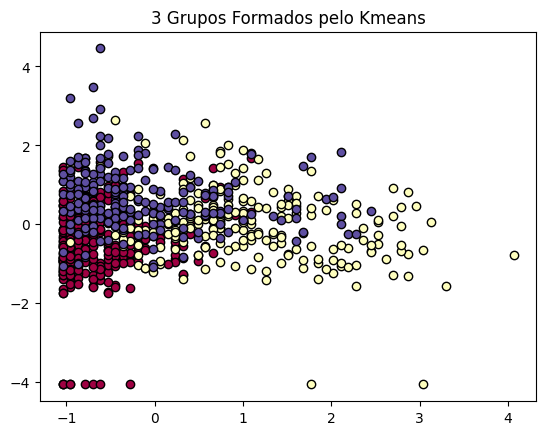

In [ ]:
unique_labels = set(results[0].labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(results[0].labels_, dtype=bool)
#core_samples_mask[results[0].core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (results[0].labels_ == k)


    xy = X_scale[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_scale[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title('%d Grupos Formados pelo Kmeans' %n_grupos[0])
plt.show()

## * Gráfico DBSCAN

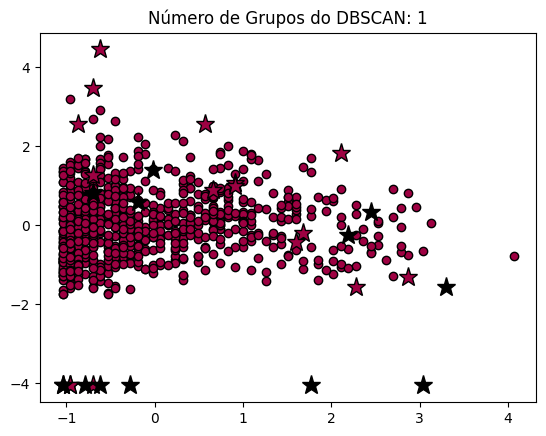

In [ ]:
unique_labels = set(results[1].labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(results[1].labels_, dtype=bool)
core_samples_mask[results[1].core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (results[1].labels_ == k)


    xy = X_scale[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = X_scale[class_member_mask & ~core_samples_mask]
    plt.plot( xy[:, 0], xy[:, 1], "*",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title('Número de Grupos do DBSCAN: %d' %n_grupos[1])
plt.show()

## * Gráfico PCA

In [ ]:
modelPca = PCA(n_components = 3, random_state=43)
resPCA=modelPca.fit(X_scale)
reduct_Diabets = modelPca.transform(X_scale)
PCAkmeans = KMeans(n_clusters = 3, random_state=30).fit(reduct_Diabets)


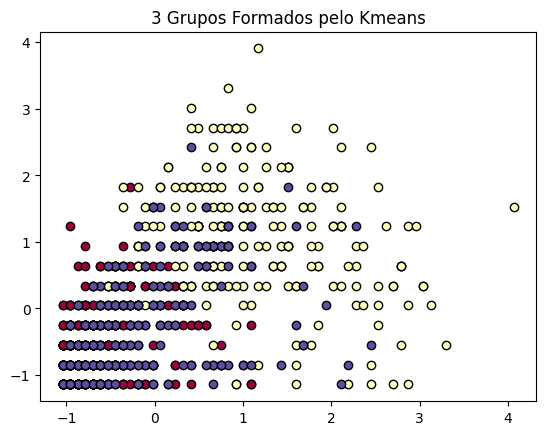

In [ ]:
unique_labels = set(PCAkmeans.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(PCAkmeans.labels_, dtype=bool)
#core_samples_mask[results[0].core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (results[0].labels_ == k)


    xy = X_scale[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_scale[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title('%d Grupos Formados pelo Kmeans' %n_grupos[0])
plt.show()

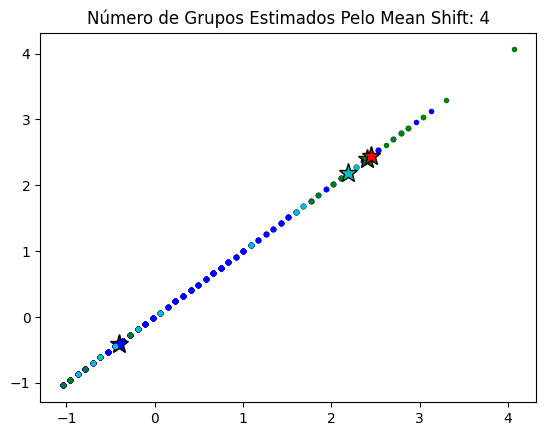

In [ ]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centers[k]
    plt.plot(X_scale[my_members, 0], X_scale[my_members, 0], col + '.')
    plt.plot(cluster_center[0], cluster_center[0], '*', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Número de Grupos Estimados Pelo Mean Shift: %d' % n_clusters)
plt.show()